In [2]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
df = pd.read_csv('../dataset/features/data.csv', index_col=False)

In [3]:
df.head()

,ID,Label,1,2,3,4,5,6,7,8,...,223451,223452,223453,223454,223455,223456,223457,223458,223459,223460
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# correlate the features to see 
train_labels = df['Label']
train_data = df.drop(['ID','Label'],axis=1)

y = train_labels.values
X = train_data.values

In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Importance calculation with XGBClassifier

In [7]:
# # xgboost for feature importance on a classification problem
# from xgboost import XGBClassifier
# from matplotlib import pyplot
# # define the model
# model = XGBClassifier()
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

#### Importance calculation with RandomForestRegressor

In [8]:
# from sklearn.ensemble import RandomForestRegressor
# from matplotlib import pyplot
# # define dataset
# # define the model
# model = RandomForestRegressor()
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

#### Analyse the importance with coff

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_data, train_labels)
importances = pd.DataFrame(data={
    'Attribute': train_data.columns,
    'Importance': model.coef_[0]
})


In [35]:
top_importances = importances[importances['Importance']>0.01]

In [135]:
top_importances

,Attribute,Importance
21,22,0.034860
24,25,0.017847
82,83,0.027897
128,129,0.034528
138,139,0.011867
...,...,...
222766,222767,0.011414
222802,222803,0.019324
223004,223005,0.022291
223403,223404,0.011520


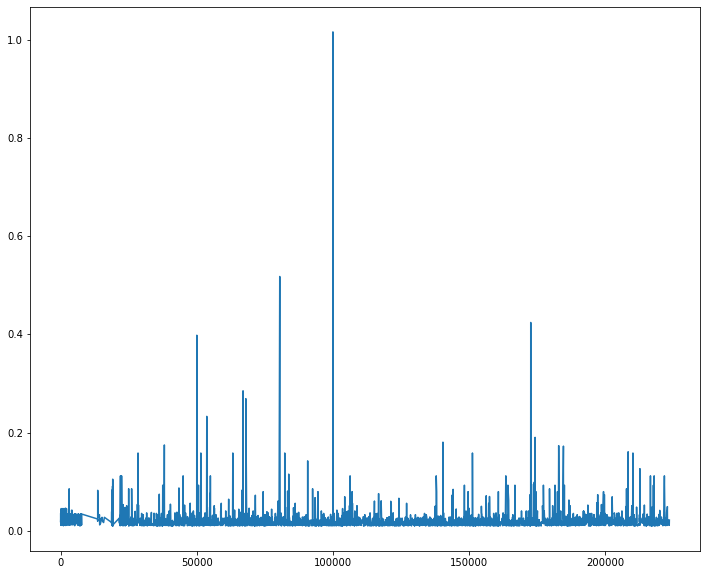

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.plot(top_importances['Attribute'], top_importances['Importance'])
plt.show()

In [142]:
sorted_importances = top_importances.sort_values(by='Importance', ascending=False)
sorted_importances 

,Attribute,Importance
99964,99965,1.015501
80442,80443,0.517864
172569,172570,0.424336
50001,50002,0.398329
66973,66974,0.285239
...,...,...
35437,35438,0.010195
157775,157776,0.010120
165646,165647,0.010110
19163,19164,0.010080


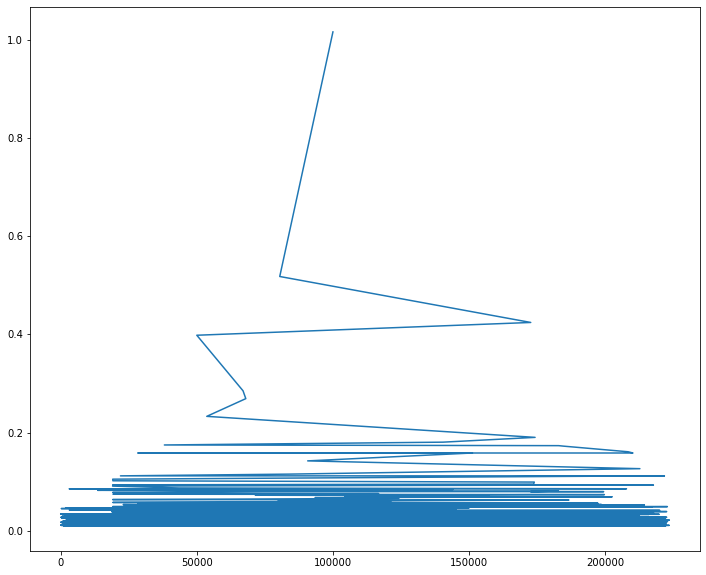

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))

plt.plot(sorted_importances ['Attribute'], sorted_importances['Importance'])
plt.show()

In [146]:
# aggregate the importance by range of value
df_imp = top_importances 
df_imp.Attribute = df_imp.Attribute.values.astype('int')
att_indexes = df_imp.Attribute.values.astype('int')
intervals = pd.cut(np.array(df_imp["Attribute"].values), np.arange(0, 240000, 2000))
# calculate the aggregated importances within different ranges
agg_top_importances = df_imp.groupby(pd.cut(np.array(df_imp["Attribute"].values), np.arange(0, 240000, 2000))).sum()
agg_top_importances[:20]

C:\Users\ren\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Attribute,Importance
"(0, 2000]",97549,2.738576
"(2000, 4000]",202004,1.829679
"(4000, 6000]",211437,1.080190
"(6000, 8000]",297842,1.046653
"(8000, 10000]",0,0.000000
"(10000, 12000]",0,0.000000
"(12000, 14000]",54613,0.161132
"(14000, 16000]",148177,0.222007
"(16000, 18000]",16084,0.027897
"(18000, 20000]",2057982,3.291211


In [119]:
# calcuate the number of features within a range
intervals.value_counts().index[0].left

0

In [126]:
left_points = [(index.left+index.right)/2 for index in intervals.value_counts().index]
left_points

[1000.0,
 3000.0,
 5000.0,
 7000.0,
 9000.0,
 11000.0,
 13000.0,
 15000.0,
 17000.0,
 19000.0,
 21000.0,
 23000.0,
 25000.0,
 27000.0,
 29000.0,
 31000.0,
 33000.0,
 35000.0,
 37000.0,
 39000.0,
 41000.0,
 43000.0,
 45000.0,
 47000.0,
 49000.0,
 51000.0,
 53000.0,
 55000.0,
 57000.0,
 59000.0,
 61000.0,
 63000.0,
 65000.0,
 67000.0,
 69000.0,
 71000.0,
 73000.0,
 75000.0,
 77000.0,
 79000.0,
 81000.0,
 83000.0,
 85000.0,
 87000.0,
 89000.0,
 91000.0,
 93000.0,
 95000.0,
 97000.0,
 99000.0,
 101000.0,
 103000.0,
 105000.0,
 107000.0,
 109000.0,
 111000.0,
 113000.0,
 115000.0,
 117000.0,
 119000.0,
 121000.0,
 123000.0,
 125000.0,
 127000.0,
 129000.0,
 131000.0,
 133000.0,
 135000.0,
 137000.0,
 139000.0,
 141000.0,
 143000.0,
 145000.0,
 147000.0,
 149000.0,
 151000.0,
 153000.0,
 155000.0,
 157000.0,
 159000.0,
 161000.0,
 163000.0,
 165000.0,
 167000.0,
 169000.0,
 171000.0,
 173000.0,
 175000.0,
 177000.0,
 179000.0,
 181000.0,
 183000.0,
 185000.0,
 187000.0,
 189000.0,
 191000.0,

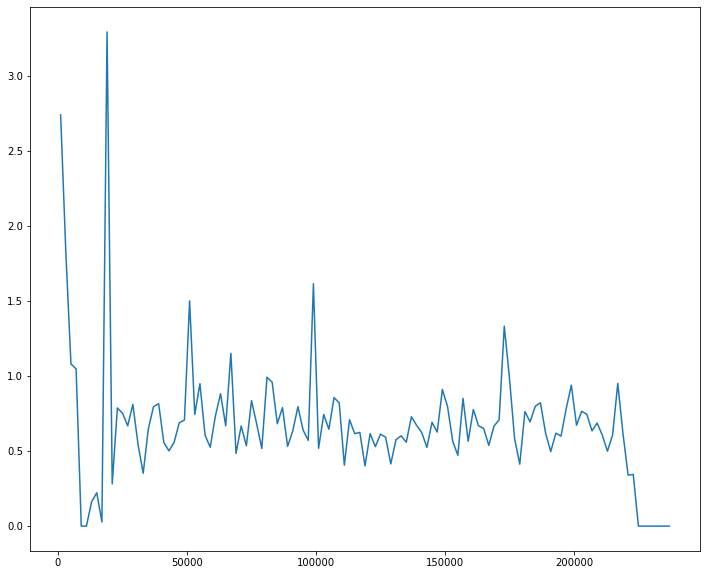

[2.73857641 1.82967948 1.08018961 1.04665258 0.         0.
 0.16113227 0.22200667 0.02789658 3.29121074 0.28097211 0.78692287
 0.75147948 0.66757529 0.81015198 0.54560152 0.3518477  0.64669491
 0.79510778 0.81558998 0.55682124 0.50083617 0.55835415 0.68825774
 0.70635411 1.49953206 0.74344889 0.94843303 0.60497378 0.52488133
 0.73355799 0.88140394 0.66809389 1.15054293 0.48424696 0.6669425
 0.53432041 0.83560625 0.6812055  0.51670936 0.99139284 0.95848987
 0.68151067 0.78878944 0.5315134  0.63409272 0.79556626 0.63973709
 0.57071156 1.61419416 0.51782892 0.74330501 0.64502072 0.85559902
 0.82070838 0.40585692 0.709356   0.6157752  0.6241309  0.40044684
 0.61609025 0.5289856  0.612576   0.59149114 0.41408868 0.57521643
 0.60120117 0.55864757 0.72812839 0.67137412 0.62241538 0.52422487
 0.69116396 0.62599738 0.91004595 0.79646458 0.5651482  0.47136961
 0.85057393 0.5650289  0.77645707 0.66803474 0.65059018 0.5372564
 0.66533076 0.70806617 1.331394   0.98734175 0.58171891 0.41238026
 0.76

In [133]:
plt.figure(figsize=(12,10))
plt.plot(left_points, agg_top_importances["Importance"].values)
# agg_top_importances
plt.show()
print(agg_top_importances["Importance"].values)

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

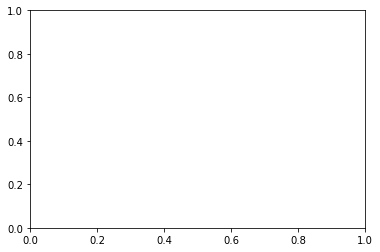

In [92]:

plt.bar(agg_top_importances.index, agg_top_importances['Importance'], color='#087E8B')
plt.figure(figsize=(12,10))
plt.show()

In [28]:
top_importances['Attribute'].index.value_counts(bins=range(0,230000,10000), sort=True)[:20]

99964      99965
80442      80443
172569    172570
50001      50002
66973      66974
           ...  
35437      35438
157775    157776
165646    165647
19163      19164
85124      85125
Name: Attribute, Length: 3706, dtype: object

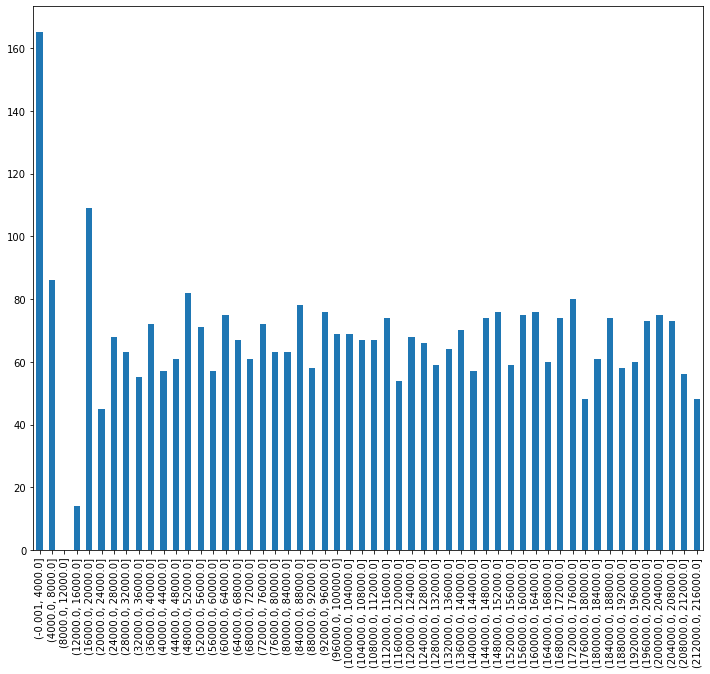

In [26]:
top_importances['Attribute'].index.value_counts(bins=range(0,220000,4000), sort=False).plot(kind='bar',figsize=(12,10))

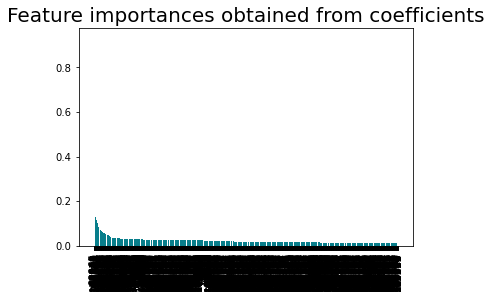

<Figure size 864x720 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt

plt.bar(x=top_importances['Attribute'], height=top_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.figure(figsize=(12,10))
plt.show()

#### Importance with PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(train_data)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()